# Projektna naloga: Interval index
## 2.del - Iskanje maksimalne in minimalne vrendosti indeksa med vsemi kubičnimi grafi


$$
Int(G) = \sum_{\{u,v\} \subset V} \left( |I_G(u, v)| - 1 \right) 
$$ 
$$
I(u,v) = \{w \in V : d(u,w) + d(w,v) = d(u,v)\}
$$

In [11]:
from sage.graphs.graph import Graph
from sage.graphs.graph_generators import graphs
import random
from random import choice
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
def interval_index(G):

    V = G.vertices()  # dobimo vsa vozlišča
    Int_G = 0
    
    # Iteriramo cez  vse pare vozlišč {u, v}
    for u in V:
        for v in V:
            # Izognemo se dvojnemu stetju (u,v) in (v,u) in (u,u)!
            if u >= v:
                continue
            d_uv = G.distance(u, v)    # poiscemo razdaljo
            
            interval_size = 0   # števec za |I(u,v)|
            
            for w in V:
                d_uw = G.distance(u, w)
                d_wv = G.distance(w, v)
                
                if d_uw + d_wv == d_uv:
                    interval_size += 1
            
            Int_G += (interval_size - 1)
            
            
    return Int_G

#### Metahevristično iskanje - Hill-Climbing algortiem
Namesto da pogledamo vse možnosti za kubične grafe, začnemo z nekim grafom in naredimo majhno spremembo ("tweak"), potem pa pogledamo, če ima nov graf boljši intervalni indeks in če ja, ga obdržimo, nato pa spet ponovimo postopek.

In [ ]:
def graf_lastnosti(G):
    lastnosti = {
        "Intervalni indeks": interval_index(G),
        "Premer (diameter)": G.diameter(),     # najdaljša možna razdalja med dvema vozliščema
        "Radij (radius)": G.radius(),          # dolžina najdaljše najkrajše poti od v do katerega koli drugega vozlišča v grafu
        "Obseg (girth)": G.girth(),            # dolžina najmanjšega cikla
        "dvodelen?": G.is_bipartite(),    
        "Število vozlišč": G.order(),
        "Število robov": G.size(),
        "Hamiltonov?": G.is_hamiltonian()
    }
    return lastnosti

Testiranje zgornje funkcije na grafu iz 1. dela (naključni graf na 100 vozliščih, ki ima največji intervalni indeks)

In [14]:
G = Graph("~?@cK@H?dBGEdW__@?BMEwC?gAIW_aJd[?A??k_DWEjcOTA\XTXis?ROYfKORGoAAgp?bJC`TBSGGC_IT]?d?SRW?AfiAvAFJPEAB_gu_WGO_@G_abFM?@k?oOio_dGP?`B[@SE`cCg@]THSq?CFaova@G`GyBAH?TPDW_AmGOP_TZ?CaTsxAl?g?SS`_peCDGDdY?_]IG`??G`Pm@_]agAK`Am_qIYP[G?H}ke_QOGD@[QA?_b?MMV|]_?@_NE_pQ?A_}bZ??C?ONP?[D?pbCGaC?moCOiSWo?oPN_W`QCGKGGCcTMR@_hDaI_o?bCyXg_PSUcL?ZBUCW_eKTSHKOaOdwgBEKOSIcOIJyUY?AT?OnfD[gE?`?gWOAADrC?jCF?SOOGUCQ?aZCAL?XONWA@FOG@_HCW@wah@BTCsODbOg[?_???bGaR_?AYp?A@BoAF??sACg_P?BZ?BgaAJHTRRaO@`KKID[PP@nt[S`O?y_?OgcG@?u?PCAKQ?aG?NO?eA_oHCJA?aUC_?NC?CE[?HMCmO@RL@EHE@CWD_J`SWcCY@?tDdSk?dBqHACAKFaZIIW_B??@sFbO|TC?eAAdQ??c@]gWjsgPAKpJsu_noEcHPOCK?@GUAOA?BahMO?HSoEMHFc@qW[AgnBRhp_Q@B`GZ?KcOK?a?PPRTP?xDImFuYeqP@if]EbwbAOHwh?N_A@gBd_?AYPLAB_`QC@G|{@iV?C?DPCCpXm]gHHP__Om[EVEKWK?rc`mWAOmR?V?BSC`]FHKciScaEKj?bHCbCoga@qOd?dG??v`_WH_O?G????BXGpnBgC??_I_")
graf_lastnosti(G)

<>:1: SyntaxWarning: invalid escape sequence '\X'
<>:1: SyntaxWarning: invalid escape sequence '\X'
/tmp/ipykernel_2134/2490477580.py:1: SyntaxWarning: invalid escape sequence '\X'
  G = Graph("~?@cK@H?dBGEdW__@?BMEwC?gAIW_aJd[?A??k_DWEjcOTA\XTXis?ROYfKORGoAAgp?bJC`TBSGGC_IT]?d?SRW?AfiAvAFJPEAB_gu_WGO_@G_abFM?@k?oOio_dGP?`B[@SE`cCg@]THSq?CFaova@G`GyBAH?TPDW_AmGOP_TZ?CaTsxAl?g?SS`_peCDGDdY?_]IG`??G`Pm@_]agAK`Am_qIYP[G?H}ke_QOGD@[QA?_b?MMV|]_?@_NE_pQ?A_}bZ??C?ONP?[D?pbCGaC?moCOiSWo?oPN_W`QCGKGGCcTMR@_hDaI_o?bCyXg_PSUcL?ZBUCW_eKTSHKOaOdwgBEKOSIcOIJyUY?AT?OnfD[gE?`?gWOAADrC?jCF?SOOGUCQ?aZCAL?XONWA@FOG@_HCW@wah@BTCsODbOg[?_???bGaR_?AYp?A@BoAF??sACg_P?BZ?BgaAJHTRRaO@`KKID[PP@nt[S`O?y_?OgcG@?u?PCAKQ?aG?NO?eA_oHCJA?aUC_?NC?CE[?HMCmO@RL@EHE@CWD_J`SWcCY@?tDdSk?dBqHACAKFaZIIW_B??@sFbO|TC?eAAdQ??c@]gWjsgPAKpJsu_noEcHPOCK?@GUAOA?BahMO?HSoEMHFc@qW[AgnBRhp_Q@B`GZ?KcOK?a?PPRTP?xDImFuYeqP@if]EbwbAOHwh?N_A@gBd_?AYPLAB_`QC@G|{@iV?C?DPCCpXm]gHHP__Om[EVEKWK?rc`mWAOmR?V?BSC`]FHKciScaEKj?bHCbCoga@qOd?dG??v`_

{'Intervalni indeks': 37805,
 'Premer (diameter)': 2,
 'Radij (radius)': 2,
 'Obseg (girth)': 3,
 'dvodelen?': False,
 'Število vozlišč': 100,
 'Število robov': 1554,
 'Hamiltonov?': True}

In [ ]:
def spremeni_kubicni_graf(G):

    """ Majhna nakjucna sprememba na kubičnem grafu"""

    H = G.copy()
    edges = list(H.edges(labels=False))   # seznam vseh robov (pari vozlisc --> npr. (o,1))

    
    # Izberemo dva roba
    for _ in range(20):     # poskusimo 20-krat, da najde dober swap
        e1 = choice(edges)  # choice za naklucje
        e2 = choice(edges)
        a, b = e1
        c, d = e2
        if len({a, b, c, d}) != 4:    #da so razlicna
            continue
        
        # Poskusimo prvi swap: a-c in b-d
        H.delete_edges([e1, e2])
        H.add_edge(a, c)
        H.add_edge(b, d)
        if all(H.degree(v) == 3 for v in H.vertices()):   #samo preverimo da stopnja ostane 3
            return H
        
        # Če ne, vrnemo nazaj in poskusimo drugi swap: a-d in b-c
        H.delete_edge(a, c)
        H.delete_edge(b, d)
        H.add_edge(a, d)
        H.add_edge(b, c)
        if all(H.degree(v) == 3 for v in H.vertices()):
            return H
        
        # Ce noben ne uspe, vrenmo nazaj
        H.add_edge(a, c)
        H.add_edge(b, d)
        H.delete_edge(a, d)
        H.delete_edge(b, c)
        H.add_edges([e1, e2])
    
    return G  

In [ ]:
def metahevristika_kubicni(n, iteracije = 20000, smer = "max"):
    if n % 2 != 0:
        print("n mora biti sodo")
        return None
    
    G = graphs.RandomRegular(3, n)      # Zacetni (naključni povezan kubični)
    while not G.is_connected():
        G = graphs.RandomRegular(3, n)
    
    ekstrem = interval_index(G)
    najboljši_graf = G.copy()
    
    print(f" Začetni Int(G) = {ekstrem} ")
    
    for i in range(iteracije):
        H = spremeni_kubicni_graf(G)
        if not H.is_connected():
            continue
        val = interval_index(H)
        if val is None:
            continue
        
        # Za max
        if smer == "max" and val > ekstrem:
            ekstrem = val
            najboljši_graf = H.copy()
            G = H                  # nadaljujemo iz boljšega
            print(f" Nov max: {ekstrem} (korak {i})")
        
        # Za min
        elif smer == "min" and val < ekstrem:
            ekstrem = val
            najboljši_graf = H.copy()
            G = H
            print(f" Nov min: {ekstrem} (korak {i})")
    
    return najboljši_graf, ekstrem

In [ ]:
def sistematicni_kubicni(n, smer= "max"):

    """Za vse grafe na n vozliščih iščemo najboljšega """
    if n % 2 != 0:
        print("n mora biti sodo")
        return None
    
    ekstrem = -1 if smer == "max" else float('inf')
    najboljši_graf = None
    
    for G in graphs.nauty_geng(f"{n} -c -d3 -D3"):  # vsi povezani kubični, d3 je minimlna stopjna in D3 maksimalna
        val = interval_index(G)
        if (smer == "max" and val > ekstrem) or (smer == "min" and val < ekstrem):
            ekstrem = val
            najboljši_graf = G.copy()
            print(f"Nov ekstrem: {ekstrem}")
    
    return najboljši_graf, ekstrem



Sistematičen pregled za majhno n...
Nov ekstrem: 135
Nov ekstrem: 139
Nov ekstrem: 135
Nov ekstrem: 115
Nov ekstrem: 107
Nov ekstrem: 99
Nov ekstrem: 75

=== MAKSIMALNI GRAF ===
{'Intervalni indeks': 139, 'Premer (diameter)': 5, 'Radij (radius)': 3, 'Obseg (girth)': 3, 'dvodelen?': False, 'Število vozlišč': 10, 'Število robov': 15, 'Hamiltonov?': False}


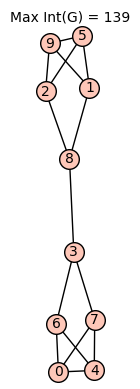


=== MINIMALNI GRAF ===
{'Intervalni indeks': 75, 'Premer (diameter)': 2, 'Radij (radius)': 2, 'Obseg (girth)': 5, 'dvodelen?': False, 'Število vozlišč': 10, 'Število robov': 15, 'Hamiltonov?': False}


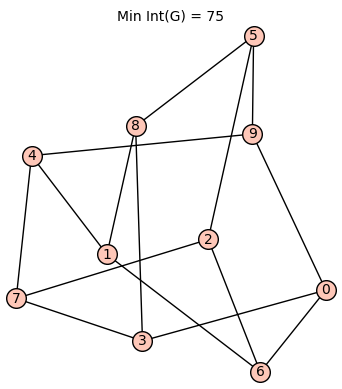

Metahevristika za veliko n...
Začetni Int(G) = 390
Nov max: 411 (korak 1)
Nov max: 414 (korak 14)
Nov max: 451 (korak 25)
Nov max: 476 (korak 38)
Nov max: 537 (korak 59)
Nov max: 608 (korak 122)
Začetni Int(G) = 398
Nov min: 372 (korak 2)
Nov min: 366 (korak 5)
Nov min: 363 (korak 7)
Nov min: 356 (korak 8)
Nov min: 350 (korak 11)
Nov min: 346 (korak 12)
Nov min: 344 (korak 24)
Nov min: 343 (korak 31)
Nov min: 333 (korak 32)
Nov min: 318 (korak 44)
Nov min: 317 (korak 55)
Nov min: 314 (korak 232)
Nov min: 310 (korak 263)
Nov min: 304 (korak 280)
Nov min: 300 (korak 285)
Nov min: 296 (korak 533)

=== MAKSIMALNI GRAF ===
{'Intervalni indeks': 608, 'Premer (diameter)': 9, 'Radij (radius)': 5, 'Obseg (girth)': 3, 'dvodelen?': False, 'Število vozlišč': 16, 'Število robov': 24, 'Hamiltonov?': False}


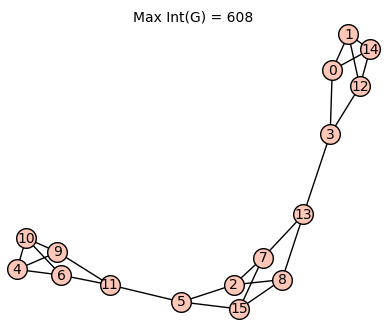


=== MINIMALNI GRAF ===
{'Intervalni indeks': 296, 'Premer (diameter)': 3, 'Radij (radius)': 3, 'Obseg (girth)': 4, 'dvodelen?': False, 'Število vozlišč': 16, 'Število robov': 24, 'Hamiltonov?': True}


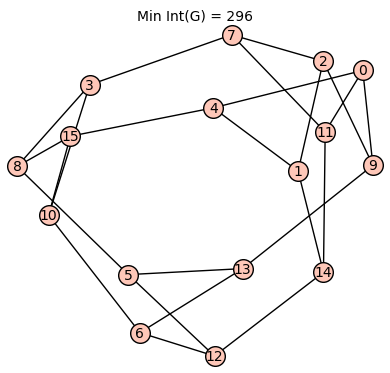

In [ ]:
# Glavna funkcija s pomočjo metahevristike in nauty_geng 
def najdi_ekstreme_kubicni(n, iteracije = 10000):

    if n <= 12:  # za majhne n: sistematično
        print("Sistematičen pregled za majhno n...")
        graf_max, max_val = sistematicni_kubicni(n, "max")
        graf_min, min_val = sistematicni_kubicni(n, "min")

    else:  # za velika n: metahevristika
        print("Metahevristika za veliko n...")
        graf_max, max_val = metahevristika_kubicni(n, iteracije, "max")
        graf_min, min_val = metahevristika_kubicni(n, iteracije, "min")
    

    print("\n=== MAKSIMALNI GRAF ===")
    print(graf_lastnosti(graf_max))
    graf_max.show(title= f"Max Int(G) = {max_val}")
    
    print("\n=== MINIMALNI GRAF ===")
    print(graf_lastnosti(graf_min))
    graf_min.show(title= f"Min Int(G) = {min_val}")
    


najdi_ekstreme_kubicni(10)  # majhno n
najdi_ekstreme_kubicni(16, iteracije=20000)  # veliko n


In [ ]:

najdi_ekstreme_kubicni(50, iteracije=20000)  # veliko n

Metahevristika za veliko n...
Začetni Int(G) = 6168
Nov max: 6340 (korak 1)
Nov max: 6407 (korak 4)
Nov max: 6503 (korak 5)
Nov max: 6507 (korak 8)
Nov max: 6538 (korak 9)
Nov max: 6590 (korak 11)
Nov max: 6612 (korak 13)
Nov max: 6628 (korak 14)
Nov max: 6688 (korak 18)
Nov max: 6788 (korak 26)
Nov max: 6795 (korak 37)
Nov max: 7071 (korak 39)
Nov max: 7073 (korak 47)
Nov max: 7115 (korak 60)
Nov max: 7263 (korak 65)
Nov max: 7307 (korak 66)
Nov max: 7363 (korak 68)
Nov max: 7377 (korak 71)
Nov max: 7380 (korak 80)
Nov max: 7404 (korak 88)
Nov max: 7419 (korak 92)
Nov max: 7536 (korak 96)
Nov max: 7620 (korak 137)
Nov max: 7694 (korak 147)
Nov max: 7827 (korak 148)
Nov max: 7903 (korak 155)
Nov max: 7973 (korak 161)
Nov max: 8006 (korak 177)
Nov max: 8223 (korak 216)
Nov max: 8516 (korak 230)
Nov max: 8756 (korak 245)
Nov max: 8766 (korak 271)
Nov max: 9435 (korak 309)
Nov max: 9588 (korak 343)
Nov max: 9772 (korak 360)
Nov max: 9975 (korak 364)
Nov max: 10034 (korak 375)
Nov max: 104